In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

from IPython.display import SVG, display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

from keras import models
from keras import layers
from keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint


%matplotlib inline

original = pd.read_csv('cardio.csv')
original

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
print('Missing values:')
original.isnull().sum()

Missing values:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
print('Basic info:')
original.info()

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
print('All-in-one statistics:')
original.describe(include='all')

All-in-one statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print('Column\'s means:')
original.mean()

Column's means:


id             49972.419900
age            19468.865814
gender             1.349571
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
dtype: float64

In [6]:
print('Column\'s medians:)')
original.median()

Column's medians:)


id             50001.5
age            19703.0
gender             1.0
height           165.0
weight            72.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
dtype: float64

In [7]:
print('Column\'s ranges (max - min):')
original.max() - original.min()

Column's ranges (max - min):


id             99999.0
age            12915.0
gender             1.0
height           195.0
weight           190.0
ap_hi          16170.0
ap_lo          11070.0
cholesterol        2.0
gluc               2.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64

In [8]:
print('Column\'s standard deviations:')
original.std()

Column's standard deviations:


id             28851.302323
age             2467.251667
gender             0.476838
height             8.210126
weight            14.395757
ap_hi            154.011419
ap_lo            188.472530
cholesterol        0.680250
gluc               0.572270
smoke              0.283484
alco               0.225568
active             0.397179
cardio             0.500003
dtype: float64

In [9]:
print('Column\'s variances:')
original.var()

Column's variances:


id             8.323976e+08
age            6.087331e+06
gender         2.273745e-01
height         6.740617e+01
weight         2.072378e+02
ap_hi          2.371952e+04
ap_lo          3.552189e+04
cholesterol    4.627405e-01
gluc           3.274933e-01
smoke          8.036307e-02
alco           5.088079e-02
active         1.577512e-01
cardio         2.500035e-01
dtype: float64

Triangle matrix correlation for target Cardio: (highest - age, weight, cholesterol)


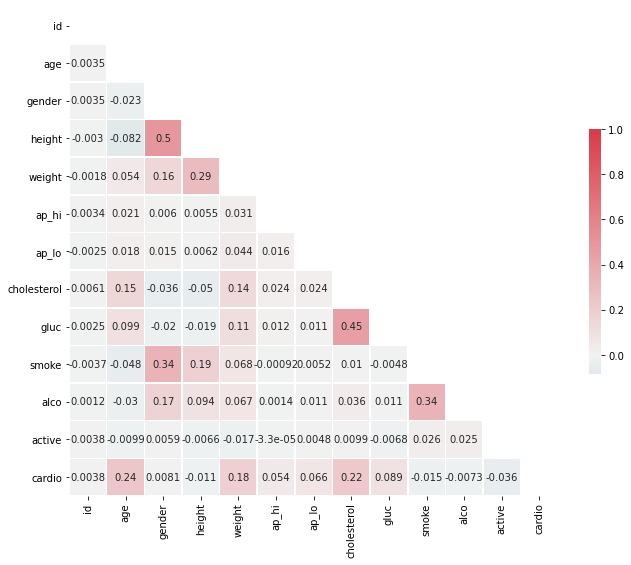

In [10]:
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
print('Triangle matrix correlation for target Cardio: (highest - age, weight, cholesterol)')    
plot_corr(original)

In [11]:
dataframe = original.copy()
dataframe.drop(['id'], axis=1, inplace=True)
dataframe.weight = dataframe.weight.astype('int64')
dataframe.age = dataframe.age.div(365.25).astype('int64')

dataframe.drop(dataframe[dataframe['ap_hi'] < 60].index, inplace = True)  # old: 60, new: 80
dataframe.drop(dataframe[dataframe['ap_hi'] > 240].index, inplace = True)  # old: 240, new: 200
dataframe.drop(dataframe[dataframe['ap_lo'] < 40].index, inplace = True)  # old: 40, new: 60
dataframe.drop(dataframe[dataframe['ap_lo'] > 190].index, inplace = True)  # old: 190, new: 120

# dataframe.drop(dataframe[dataframe['age'] < 39].index, inplace=True)
# dataframe.drop(dataframe[dataframe['age'] > 65].index, inplace=True)
# dataframe.drop(dataframe[dataframe['height'] < 130].index, inplace=True)
# dataframe.drop(dataframe[dataframe['height'] > 200].index, inplace=True)
# dataframe.drop(dataframe[dataframe['weight'] < 50].index, inplace=True)
# dataframe.drop(dataframe[dataframe['weight'] > 125].index, inplace=True)

dataframe

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76,120,80,1,1,1,0,1,0
69996,61,1,158,126,140,90,2,2,0,0,1,1
69997,52,2,183,105,180,90,3,1,0,1,0,1
69998,61,1,163,72,135,80,1,2,0,0,0,1


In [12]:
print('All-in-one statistics:')
dataframe.describe(include='all')

All-in-one statistics:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000,68775.000000
mean,52.791232,1.348731,164.361410,74.120872,126.614846,81.382043,1.364740,1.226012,0.088012,0.053639,0.803373,0.494904
std,6.764820,0.476572,8.185149,14.331441,16.763475,9.676889,0.678999,0.571989,0.283314,0.225305,0.397451,0.499978
min,29.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68775 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          68775 non-null  int64
 1   gender       68775 non-null  int64
 2   height       68775 non-null  int64
 3   weight       68775 non-null  int64
 4   ap_hi        68775 non-null  int64
 5   ap_lo        68775 non-null  int64
 6   cholesterol  68775 non-null  int64
 7   gluc         68775 non-null  int64
 8   smoke        68775 non-null  int64
 9   alco         68775 non-null  int64
 10  active       68775 non-null  int64
 11  cardio       68775 non-null  int64
dtypes: int64(12)
memory usage: 6.8 MB


<AxesSubplot:xlabel='cardio', ylabel='count'>

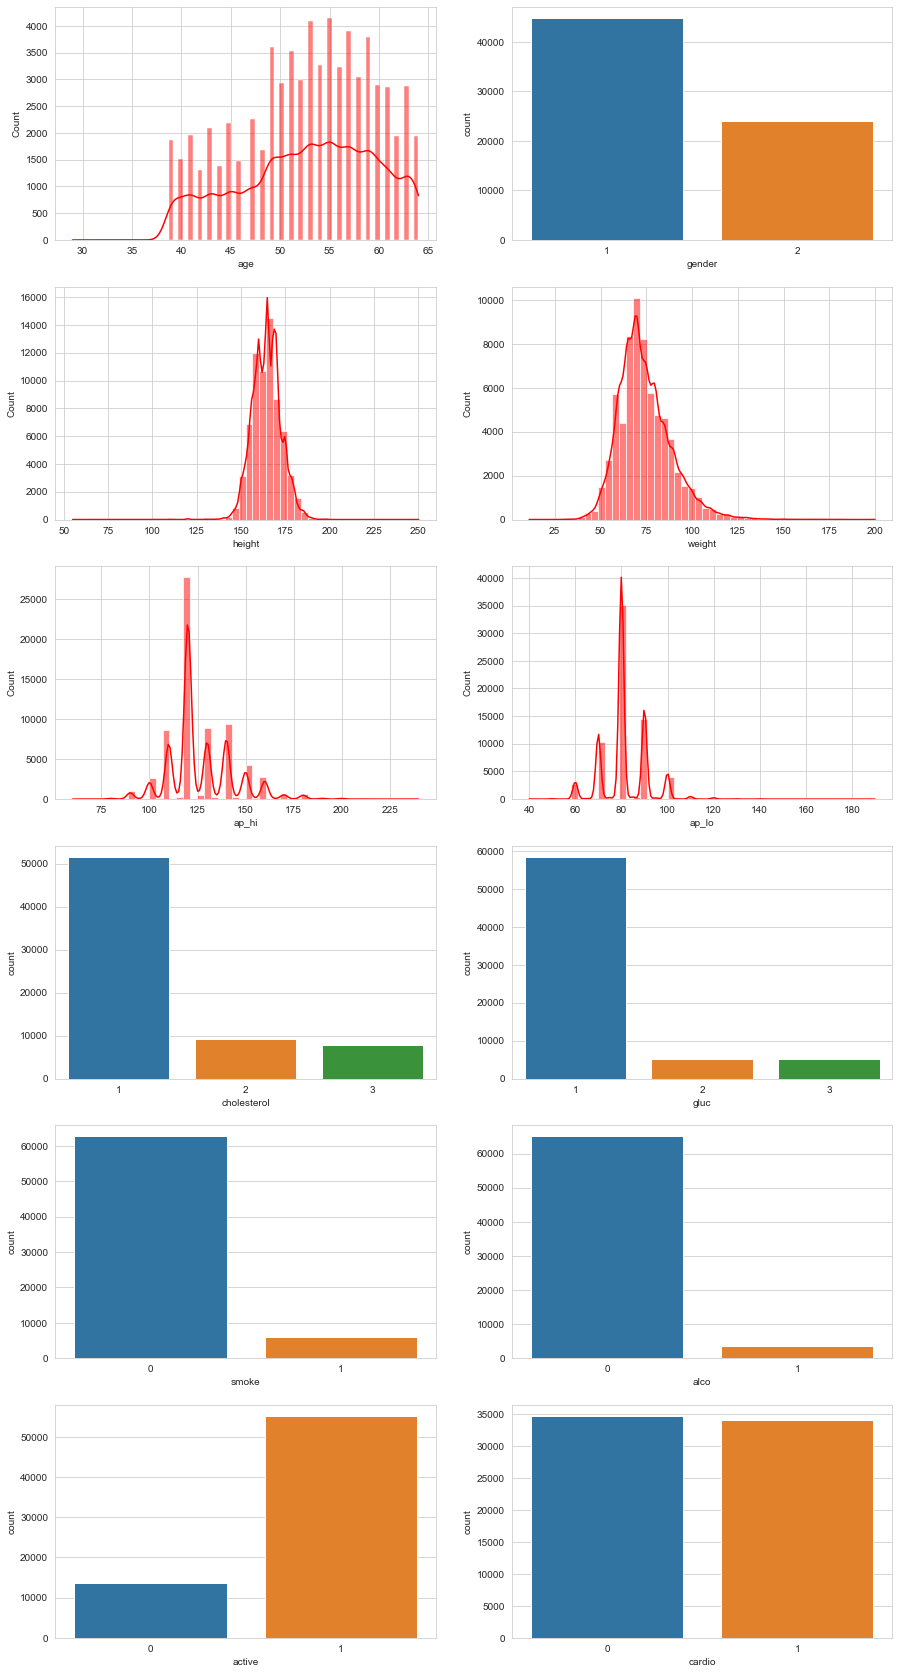

In [14]:
sns.set_style('whitegrid')
fig1, axs1 = plt.subplots(6, 2, figsize=(15, 30), num='Stats visualized')

sns.histplot(x=dataframe['age'], ax=axs1[0,0], color='red', kde=True)  # 
sns.countplot(x=dataframe['gender'], ax=axs1[0,1])
sns.histplot(x=dataframe['height'], ax=axs1[1,0], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['weight'], ax=axs1[1,1], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['ap_hi'], ax=axs1[2,0], color='red', bins=50, kde=True)  #
sns.histplot(x=dataframe['ap_lo'], ax=axs1[2,1], color='red', bins=50, kde=True)  #
sns.countplot(x=dataframe['cholesterol'], ax=axs1[3,0])
sns.countplot(x=dataframe['gluc'], ax=axs1[3,1])
sns.countplot(x=dataframe['smoke'], ax=axs1[4,0])
sns.countplot(x=dataframe['alco'], ax=axs1[4,1])
sns.countplot(x=dataframe['active'], ax=axs1[5,0])
sns.countplot(x=dataframe['cardio'], ax=axs1[5,1])

## Artificial Neural Networks

### Base Model

In [15]:
scaler = StandardScaler()
x = dataframe.drop(columns=['cardio'])
y = dataframe['cardio']

x_std = scaler.fit_transform(x)
print(f'X standardized:\n {x_std}')

X standardized:
 [[-0.41261296  1.36657846  0.44453876 ... -0.31065288 -0.23807321
   0.49472348]
 [ 0.32651033 -0.73175454 -1.0215417  ... -0.31065288 -0.23807321
   0.49472348]
 [-0.2647883  -0.73175454  0.07801864 ... -0.31065288 -0.23807321
  -2.02133119]
 ...
 [-0.11696364  1.36657846  2.27713933 ... -0.31065288  4.20038852
  -2.02133119]
 [ 1.21345828 -0.73175454 -0.1663281  ... -0.31065288 -0.23807321
  -2.02133119]
 [ 0.47433499 -0.73175454  0.6888855  ... -0.31065288 -0.23807321
   0.49472348]]


In [16]:
y = dataframe['cardio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return network

network_base = create_network()
history_base = network_base.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 1ms/step - loss: 3.8077 - accuracy: 0.6030 - val_loss: 0.6392 - val_accuracy: 0.6756
Epoch 2/10
551/551 [==============================] - 0s 758us/step - loss: 0.6329 - accuracy: 0.6777 - val_loss: 0.6202 - val_accuracy: 0.6851
Epoch 3/10
551/551 [==============================] - 0s 751us/step - loss: 0.6150 - accuracy: 0.6875 - val_loss: 0.6044 - val_accuracy: 0.6958
Epoch 4/10
551/551 [==============================] - 0s 758us/step - loss: 0.6048 - accuracy: 0.6921 - val_loss: 0.5937 - val_accuracy: 0.6996
Epoch 5/10
551/551 [==============================] - 0s 737us/step - loss: 0.5954 - accuracy: 0.6979 - val_loss: 0.5858 - val_accuracy: 0.7096
Epoch 6/10
551/551 [==============================] - 0s 746us/step - loss: 0.5897 - accuracy: 0.7060 - val_loss: 0.5816 - val_accuracy: 0.7109
Epoch 7/10
551/551 [==============================] - 0s 746us/step - loss: 0.5836 - accuracy: 0.7122 - val_loss: 0.5799 - val_accuracy: 0

In [18]:
def predict(network):
    y_pred = (network.predict(x_test) > 0.5).astype('int32')
    print(f'Total of {len(y_pred)} predictions.')
    correct = 0
    y_show = y_test.to_numpy()
    for i in range(len(y_pred)):
    #     print(f'{i}. Predicted: {y_pred[i]}, Expected: [{y_show[i]}]')
        if (y_pred[i] == y_show[i]):
            correct += 1
    print(f'Correct predictions: {correct} / {len(y_pred)} ({correct/len(y_pred)*100}%)\n')
    for i in range(20):
        j = random.randint(0, len(y_pred))
        print(f'{j}. Predicted: {y_pred[j]}, Expected: [{y_show[j]}]')

predict(network_base)

Total of 13755 predictions.
Correct predictions: 9865 / 13755 (71.71937477280989%)

8026. Predicted: [0], Expected: [1]
3634. Predicted: [1], Expected: [1]
13189. Predicted: [1], Expected: [1]
9621. Predicted: [1], Expected: [0]
5501. Predicted: [0], Expected: [0]
875. Predicted: [0], Expected: [0]
2600. Predicted: [1], Expected: [1]
11719. Predicted: [1], Expected: [1]
2658. Predicted: [0], Expected: [0]
4097. Predicted: [0], Expected: [0]
8687. Predicted: [0], Expected: [0]
12787. Predicted: [1], Expected: [1]
2039. Predicted: [0], Expected: [0]
7828. Predicted: [0], Expected: [0]
9667. Predicted: [0], Expected: [0]
3748. Predicted: [0], Expected: [0]
13634. Predicted: [1], Expected: [1]
484. Predicted: [1], Expected: [1]
5029. Predicted: [1], Expected: [0]
10477. Predicted: [1], Expected: [1]


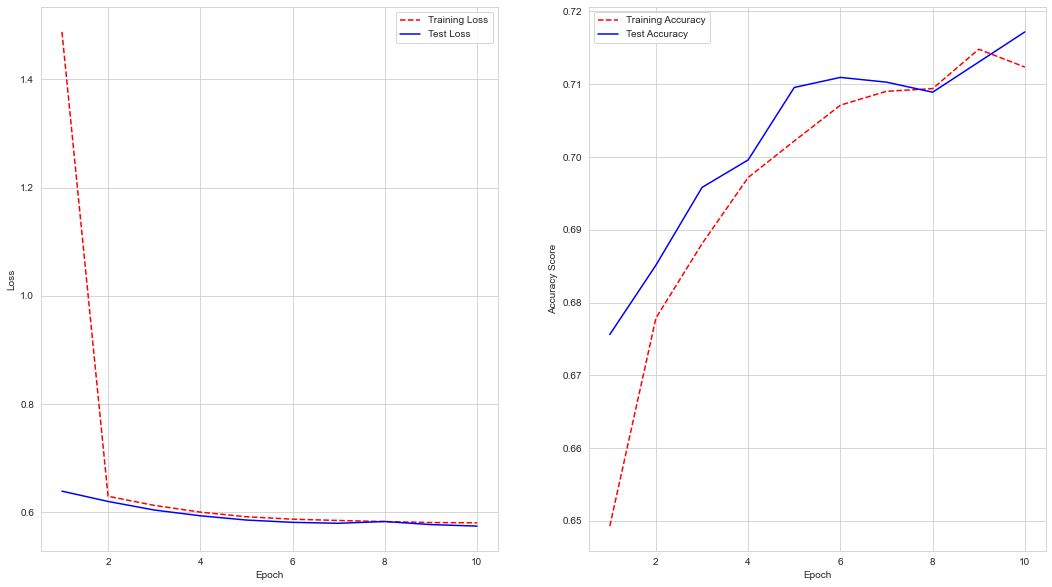

In [19]:
def show_loss_acc(history):
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    epoch_count = range(1, len(training_loss) + 1)

    fig1, axs1 = plt.subplots(1, 2, figsize=(18, 10), num='Loss and Accuracy')

    axs1[0].plot(epoch_count, training_loss, "r--")
    axs1[0].plot(epoch_count, test_loss, "b-")
    axs1[0].legend(["Training Loss", "Test Loss"])
    axs1[0].set_xlabel("Epoch")
    axs1[0].set_ylabel("Loss")

    axs1[1].plot(epoch_count, training_accuracy, "r--")
    axs1[1].plot(epoch_count, test_accuracy, "b-")
    axs1[1].legend(["Training Accuracy", "Test Accuracy"])
    axs1[1].set_xlabel("Epoch")
    axs1[1].set_ylabel("Accuracy Score")
    
show_loss_acc(history_base)

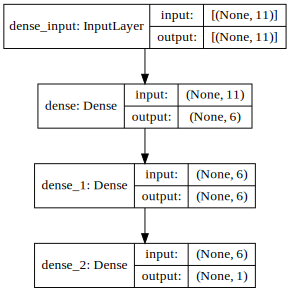

In [20]:
SVG(model_to_dot(network_base, show_shapes=True, dpi=69).create(prog="dot", format="svg"))

### Small batch

In [21]:
network_base = create_network()
history_base_small = network_base.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 651us/step - loss: 0.8400 - accuracy: 0.5674 - val_loss: 0.6549 - val_accuracy: 0.5963
Epoch 2/10
5502/5502 [==============================] - 3s 621us/step - loss: 0.6088 - accuracy: 0.6797 - val_loss: 0.5841 - val_accuracy: 0.7065
Epoch 3/10
5502/5502 [==============================] - 4s 645us/step - loss: 0.5903 - accuracy: 0.7018 - val_loss: 0.5756 - val_accuracy: 0.7152
Epoch 4/10
5502/5502 [==============================] - 4s 664us/step - loss: 0.5813 - accuracy: 0.7109 - val_loss: 0.5854 - val_accuracy: 0.6984
Epoch 5/10
5502/5502 [==============================] - 4s 656us/step - loss: 0.5849 - accuracy: 0.7086 - val_loss: 0.5695 - val_accuracy: 0.7174
Epoch 6/10
5502/5502 [==============================] - 4s 645us/step - loss: 0.5804 - accuracy: 0.7122 - val_loss: 0.5705 - val_accuracy: 0.7154
Epoch 7/10
5502/5502 [==============================] - 3s 630us/step - loss: 0.5788 - accuracy: 0.7108 - val_loss: 0.5655 -

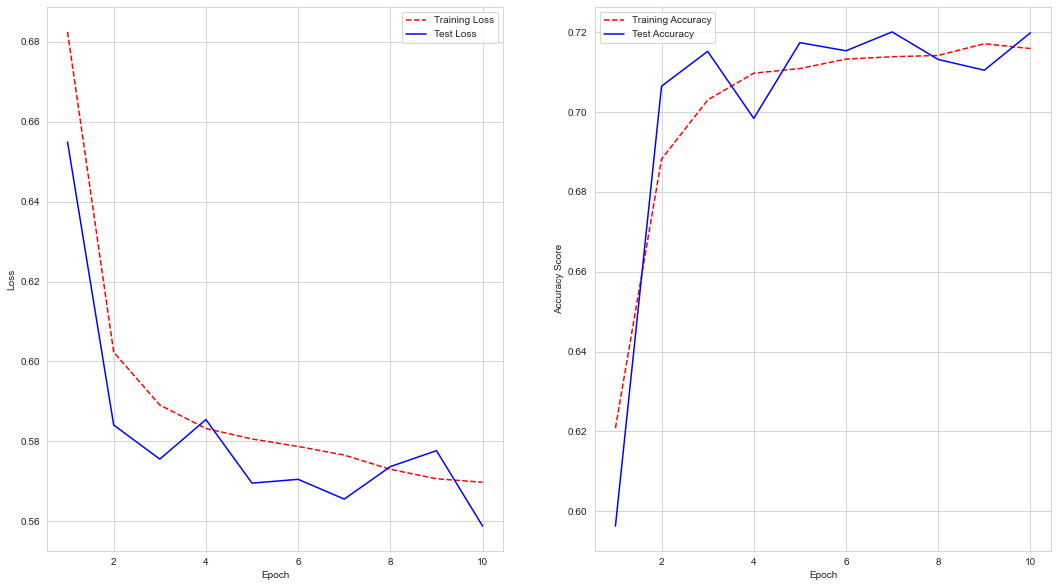

In [22]:
show_loss_acc(history_base_small)

### Hinge

In [42]:
def create_network_hinge():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    network.compile(loss="hinge", optimizer="adam", metrics=["accuracy"])

    return network

network_base_hinge = create_network_hinge()
history_base_hinge = network_base_hinge.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 1ms/step - loss: 0.8648 - accuracy: 0.6526 - val_loss: 0.8061 - val_accuracy: 0.7055
Epoch 2/10
551/551 [==============================] - 0s 742us/step - loss: 0.8080 - accuracy: 0.7042 - val_loss: 0.8007 - val_accuracy: 0.7077
Epoch 3/10
551/551 [==============================] - 0s 797us/step - loss: 0.8108 - accuracy: 0.7056 - val_loss: 0.7976 - val_accuracy: 0.7093
Epoch 4/10
551/551 [==============================] - 0s 740us/step - loss: 0.8040 - accuracy: 0.7056 - val_loss: 0.7995 - val_accuracy: 0.7053
Epoch 5/10
551/551 [==============================] - 0s 738us/step - loss: 0.8021 - accuracy: 0.7027 - val_loss: 0.7942 - val_accuracy: 0.7129
Epoch 6/10
551/551 [==============================] - 0s 737us/step - loss: 0.7987 - accuracy: 0.7092 - val_loss: 0.7942 - val_accuracy: 0.7117
Epoch 7/10
551/551 [==============================] - 0s 740us/step - loss: 0.8047 - accuracy: 0.7072 - val_loss: 0.7921 - val_accuracy: 0

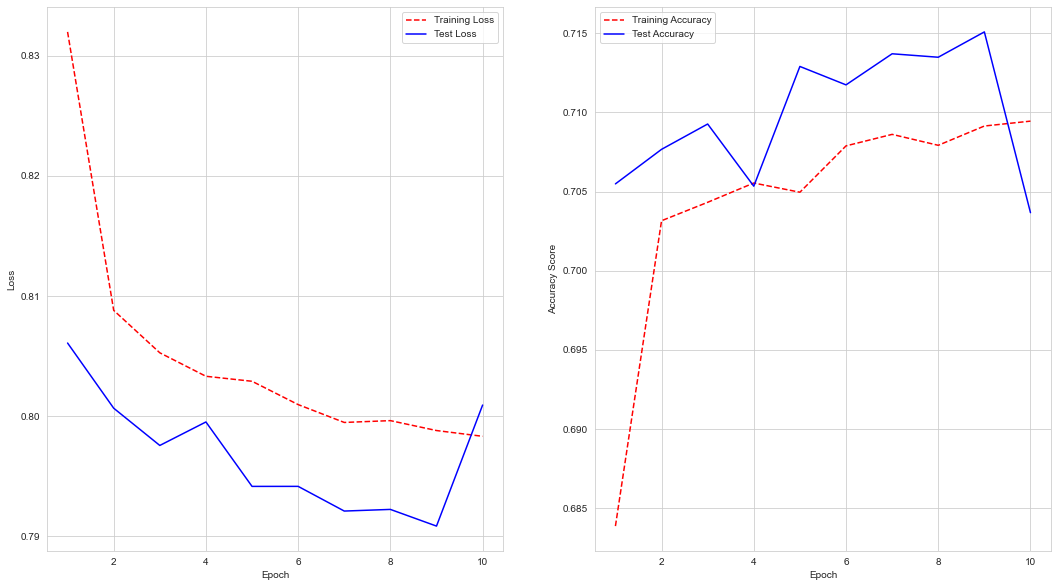

In [43]:
show_loss_acc(history_base_hinge)

### Regularization

### L2

In [45]:
def network_regularization_l2():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l2(0.01),
                             input_shape=(11,)))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
        
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_l2 = network_regularization_l2()
history_l2 = network_l2.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 975us/step - loss: 1.5277 - accuracy: 0.5787 - val_loss: 0.6964 - val_accuracy: 0.6635
Epoch 2/10
551/551 [==============================] - 0s 762us/step - loss: 0.6712 - accuracy: 0.6865 - val_loss: 0.6439 - val_accuracy: 0.7033
Epoch 3/10
551/551 [==============================] - 0s 745us/step - loss: 0.6525 - accuracy: 0.6920 - val_loss: 0.6327 - val_accuracy: 0.7066
Epoch 4/10
551/551 [==============================] - 0s 740us/step - loss: 0.6450 - accuracy: 0.6957 - val_loss: 0.6320 - val_accuracy: 0.7053
Epoch 5/10
551/551 [==============================] - 0s 744us/step - loss: 0.6356 - accuracy: 0.7001 - val_loss: 0.6377 - val_accuracy: 0.6870
Epoch 6/10
551/551 [==============================] - 0s 747us/step - loss: 0.6348 - accuracy: 0.6974 - val_loss: 0.6230 - val_accuracy: 0.7112
Epoch 7/10
551/551 [==============================] - 0s 736us/step - loss: 0.6341 - accuracy: 0.6996 - val_loss: 0.6593 - val_accuracy:

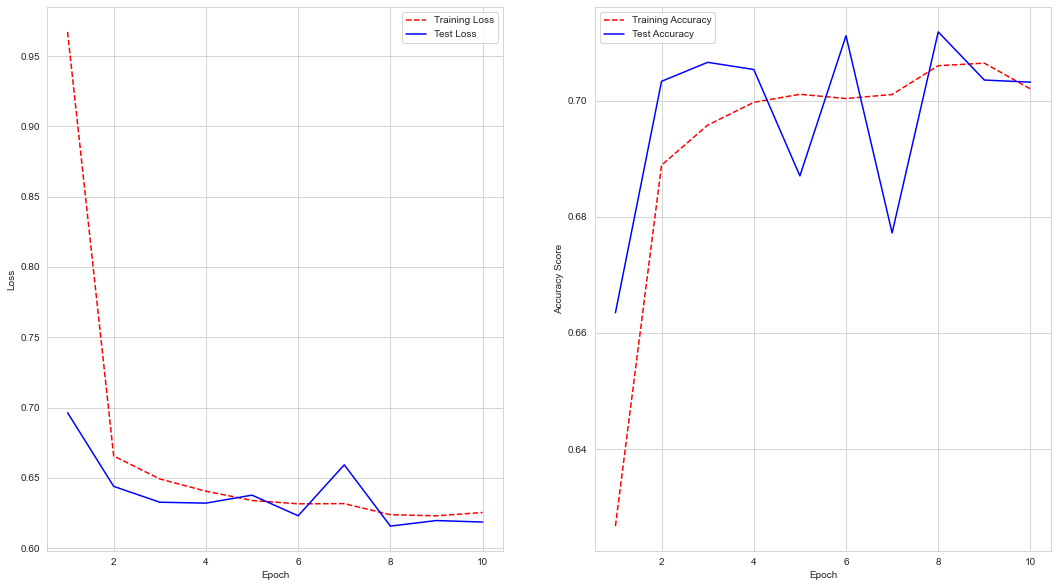

In [46]:
show_loss_acc(history_l2)

### L2 small

In [29]:
network_l2 = network_regularization_l2()
history_l2_small = network_l2.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 672us/step - loss: 0.9263 - accuracy: 0.6291 - val_loss: 0.6379 - val_accuracy: 0.7094
Epoch 2/10
5502/5502 [==============================] - 3s 625us/step - loss: 0.6627 - accuracy: 0.6790 - val_loss: 0.7046 - val_accuracy: 0.6354
Epoch 3/10
5502/5502 [==============================] - 4s 660us/step - loss: 0.6451 - accuracy: 0.6879 - val_loss: 0.6431 - val_accuracy: 0.6803
Epoch 4/10
5502/5502 [==============================] - 4s 656us/step - loss: 0.6330 - accuracy: 0.6890 - val_loss: 0.6095 - val_accuracy: 0.7081
Epoch 5/10
5502/5502 [==============================] - 3s 631us/step - loss: 0.6118 - accuracy: 0.7017 - val_loss: 0.6160 - val_accuracy: 0.6928
Epoch 6/10
5502/5502 [==============================] - 4s 645us/step - loss: 0.6074 - accuracy: 0.6981 - val_loss: 0.5902 - val_accuracy: 0.7091
Epoch 7/10
5502/5502 [==============================] - 3s 631us/step - loss: 0.5965 - accuracy: 0.7049 - val_loss: 0.5885 -

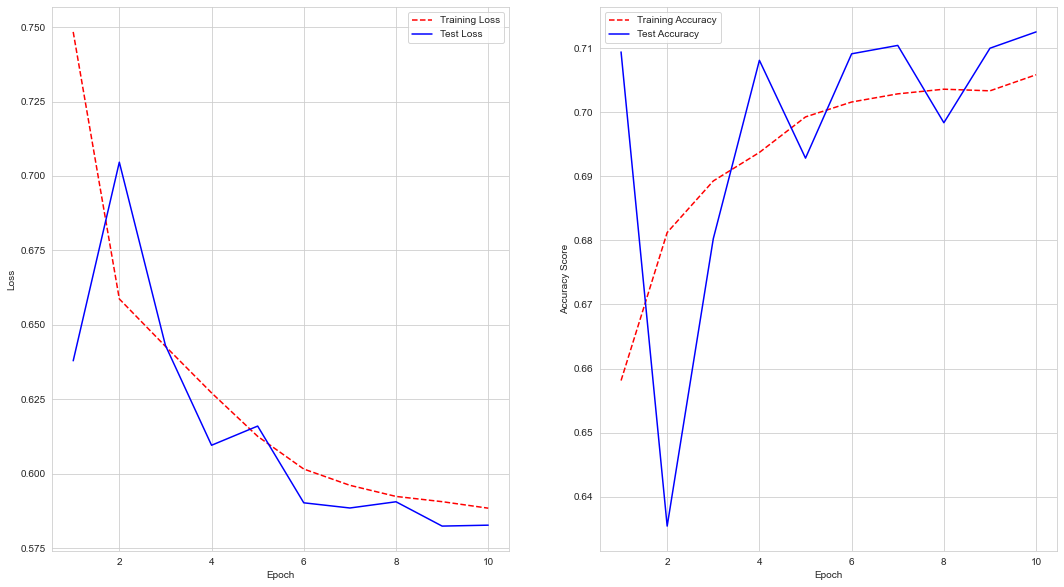

In [30]:
show_loss_acc(history_l2_small)

### L1

In [31]:
def network_regularization_l1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", kernel_regularizer=regularizers.l1(0.01),
                             input_shape=(11,)))
    network.add(layers.Dense(units=6, kernel_regularizer=regularizers.l1(0.01), activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_l1 = network_regularization_l1()
history_l1 = network_l1.fit(x_train, y_train, epochs=10, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/10
551/551 [==============================] - 1s 957us/step - loss: 7.9736 - accuracy: 0.5066 - val_loss: 0.7757 - val_accuracy: 0.6298
Epoch 2/10
551/551 [==============================] - 1s 922us/step - loss: 0.7561 - accuracy: 0.6500 - val_loss: 0.7155 - val_accuracy: 0.6433
Epoch 3/10
551/551 [==============================] - 0s 736us/step - loss: 0.7077 - accuracy: 0.6650 - val_loss: 0.6812 - val_accuracy: 0.6880
Epoch 4/10
551/551 [==============================] - 0s 743us/step - loss: 0.6813 - accuracy: 0.6884 - val_loss: 0.6676 - val_accuracy: 0.7024
Epoch 5/10
551/551 [==============================] - 0s 744us/step - loss: 0.6711 - accuracy: 0.7002 - val_loss: 0.6629 - val_accuracy: 0.7023
Epoch 6/10
551/551 [==============================] - 0s 749us/step - loss: 0.6642 - accuracy: 0.7015 - val_loss: 0.6595 - val_accuracy: 0.7013
Epoch 7/10
551/551 [==============================] - 0s 752us/step - loss: 0.6632 - accuracy: 0.6993 - val_loss: 0.6542 - val_accuracy:

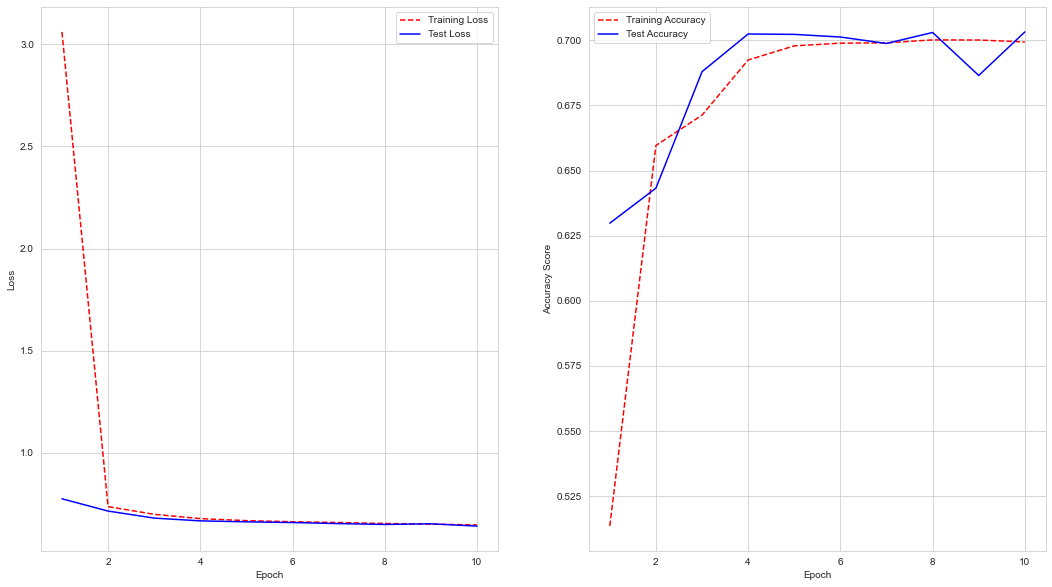

In [32]:
show_loss_acc(history_l1)

### L1 small

In [33]:
network_l1 = network_regularization_l1()
history_l1_small = network_l1.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10,
                      validation_data=(x_test, y_test))

Epoch 1/10
5502/5502 [==============================] - 4s 646us/step - loss: 4.6980 - accuracy: 0.4978 - val_loss: 0.7578 - val_accuracy: 0.6143
Epoch 2/10
5502/5502 [==============================] - 3s 623us/step - loss: 0.7106 - accuracy: 0.6410 - val_loss: 0.6360 - val_accuracy: 0.6784
Epoch 3/10
5502/5502 [==============================] - 3s 630us/step - loss: 0.6295 - accuracy: 0.6970 - val_loss: 0.6184 - val_accuracy: 0.6861
Epoch 4/10
5502/5502 [==============================] - 3s 630us/step - loss: 0.6130 - accuracy: 0.7004 - val_loss: 0.6029 - val_accuracy: 0.7049
Epoch 5/10
5502/5502 [==============================] - 3s 622us/step - loss: 0.6084 - accuracy: 0.6996 - val_loss: 0.6006 - val_accuracy: 0.7076
Epoch 6/10
5502/5502 [==============================] - 3s 620us/step - loss: 0.6050 - accuracy: 0.6999 - val_loss: 0.5980 - val_accuracy: 0.7057
Epoch 7/10
5502/5502 [==============================] - 3s 623us/step - loss: 0.6014 - accuracy: 0.7031 - val_loss: 0.6209 -

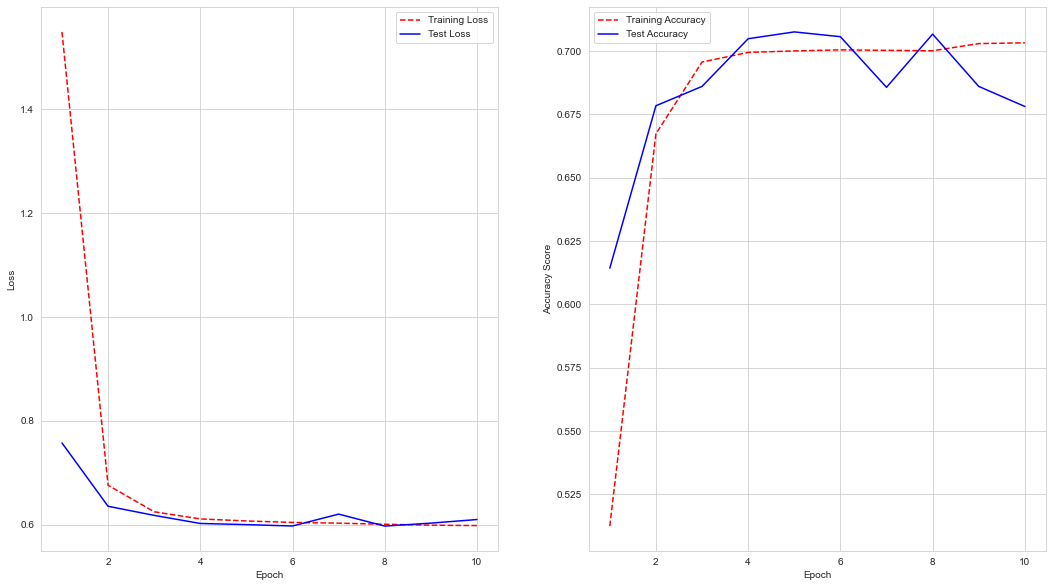

In [34]:
show_loss_acc(history_l1_small)

### Checkpoints and Early Stopping

### Base

In [35]:
def train_with_checkpoint(network, epochs=20, batch_size=100):
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    callbacks = [EarlyStopping(monitor="val_loss", patience=5),
                 ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True)]

    history = network.fit(x_train, y_train, epochs=epochs, callbacks=callbacks, verbose=1, batch_size=batch_size,
                          validation_data=(x_test, y_test))
    return history

network_base = create_network()
history_base_early = train_with_checkpoint(network_base)

Epoch 1/20
551/551 [==============================] - 1s 991us/step - loss: 0.9426 - accuracy: 0.5329 - val_loss: 0.6009 - val_accuracy: 0.6794
Epoch 2/20
551/551 [==============================] - 0s 773us/step - loss: 0.5993 - accuracy: 0.6842 - val_loss: 0.5921 - val_accuracy: 0.6917
Epoch 3/20
551/551 [==============================] - 0s 769us/step - loss: 0.5892 - accuracy: 0.6932 - val_loss: 0.5886 - val_accuracy: 0.6897
Epoch 4/20
551/551 [==============================] - 0s 773us/step - loss: 0.5892 - accuracy: 0.6931 - val_loss: 0.5829 - val_accuracy: 0.6979
Epoch 5/20
551/551 [==============================] - 0s 766us/step - loss: 0.5872 - accuracy: 0.6939 - val_loss: 0.5805 - val_accuracy: 0.7003
Epoch 6/20
551/551 [==============================] - 1s 943us/step - loss: 0.5845 - accuracy: 0.6982 - val_loss: 0.5790 - val_accuracy: 0.7039
Epoch 7/20
551/551 [==============================] - 0s 777us/step - loss: 0.5775 - accuracy: 0.7078 - val_loss: 0.5792 - val_accuracy:

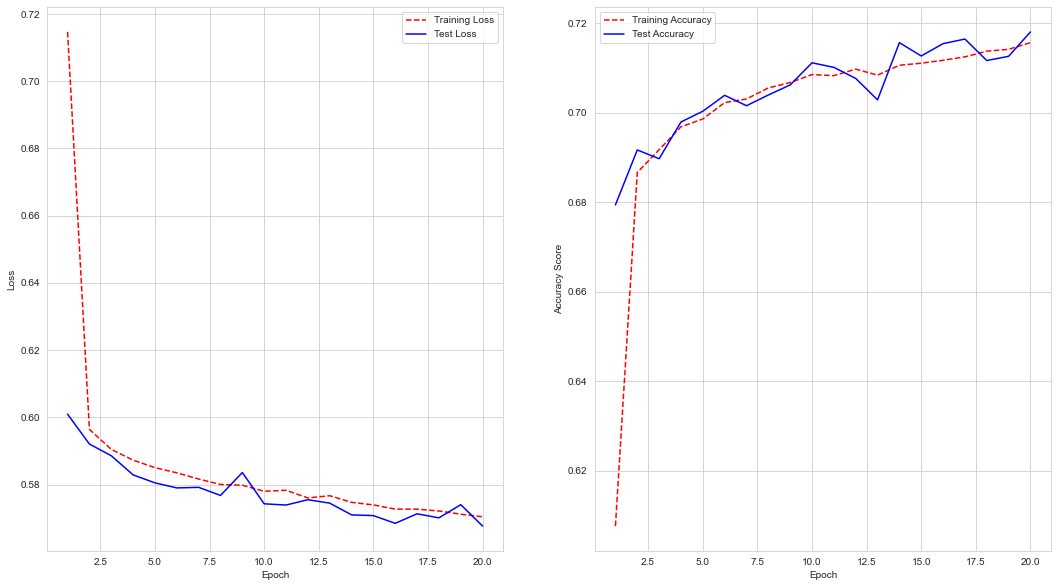

In [36]:
show_loss_acc(history_base_early)

### Base small

In [37]:
network_base = create_network()
history_base_small_early = train_with_checkpoint(network_base, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 650us/step - loss: 0.6721 - accuracy: 0.6291 - val_loss: 0.5921 - val_accuracy: 0.6947
Epoch 2/20
5502/5502 [==============================] - 3s 623us/step - loss: 0.5960 - accuracy: 0.6967 - val_loss: 0.5821 - val_accuracy: 0.7058
Epoch 3/20
5502/5502 [==============================] - 3s 625us/step - loss: 0.5889 - accuracy: 0.7006 - val_loss: 0.5913 - val_accuracy: 0.6913
Epoch 4/20
5502/5502 [==============================] - 3s 624us/step - loss: 0.5853 - accuracy: 0.7031 - val_loss: 0.5764 - val_accuracy: 0.7089
Epoch 5/20
5502/5502 [==============================] - 3s 631us/step - loss: 0.5860 - accuracy: 0.7018 - val_loss: 0.5751 - val_accuracy: 0.7093
Epoch 6/20
5502/5502 [==============================] - 4s 647us/step - loss: 0.5801 - accuracy: 0.7086 - val_loss: 0.5717 - val_accuracy: 0.7135
Epoch 7/20
5502/5502 [==============================] - 3s 635us/step - loss: 0.5809 - accuracy: 0.7069 - val_loss: 0.5712 -

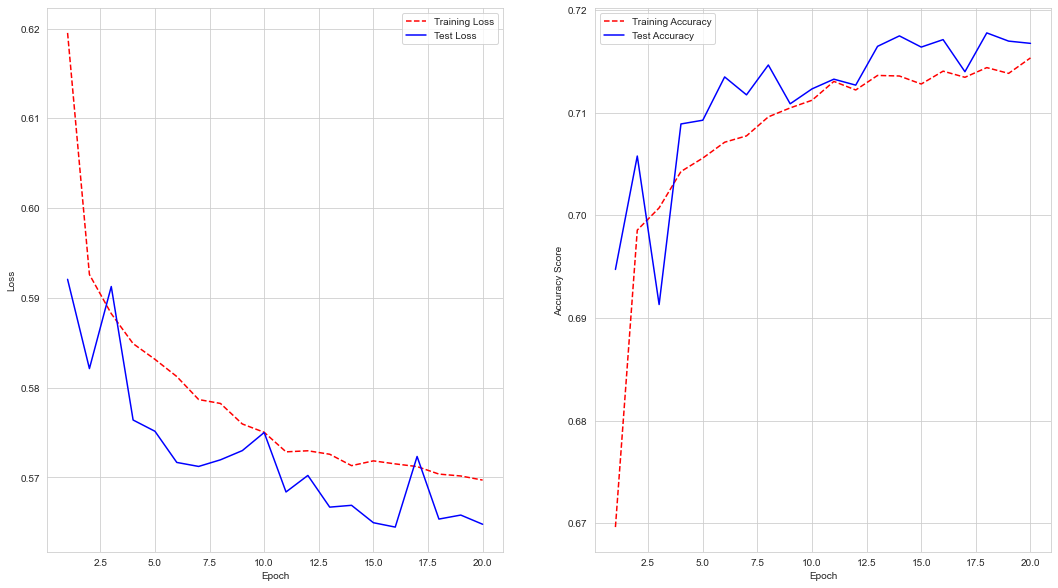

In [38]:
show_loss_acc(history_base_small_early)

### L2

In [39]:
network_l2 = network_regularization_l2()
history_l2_early = train_with_checkpoint(network_l2)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 10.9130 - accuracy: 0.6035 - val_loss: 0.7151 - val_accuracy: 0.6957
Epoch 2/20
551/551 [==============================] - 0s 797us/step - loss: 0.6991 - accuracy: 0.6984 - val_loss: 0.6543 - val_accuracy: 0.7065
Epoch 3/20
551/551 [==============================] - 0s 802us/step - loss: 0.6562 - accuracy: 0.7016 - val_loss: 0.6424 - val_accuracy: 0.7029
Epoch 4/20
551/551 [==============================] - 0s 782us/step - loss: 0.6409 - accuracy: 0.7055 - val_loss: 0.6423 - val_accuracy: 0.6924
Epoch 5/20
551/551 [==============================] - 0s 775us/step - loss: 0.6402 - accuracy: 0.6995 - val_loss: 0.6284 - val_accuracy: 0.7087
Epoch 6/20
551/551 [==============================] - 0s 769us/step - loss: 0.6371 - accuracy: 0.7019 - val_loss: 0.6260 - val_accuracy: 0.7083
Epoch 7/20
551/551 [==============================] - 0s 797us/step - loss: 0.6271 - accuracy: 0.7081 - val_loss: 0.6257 - val_accuracy: 

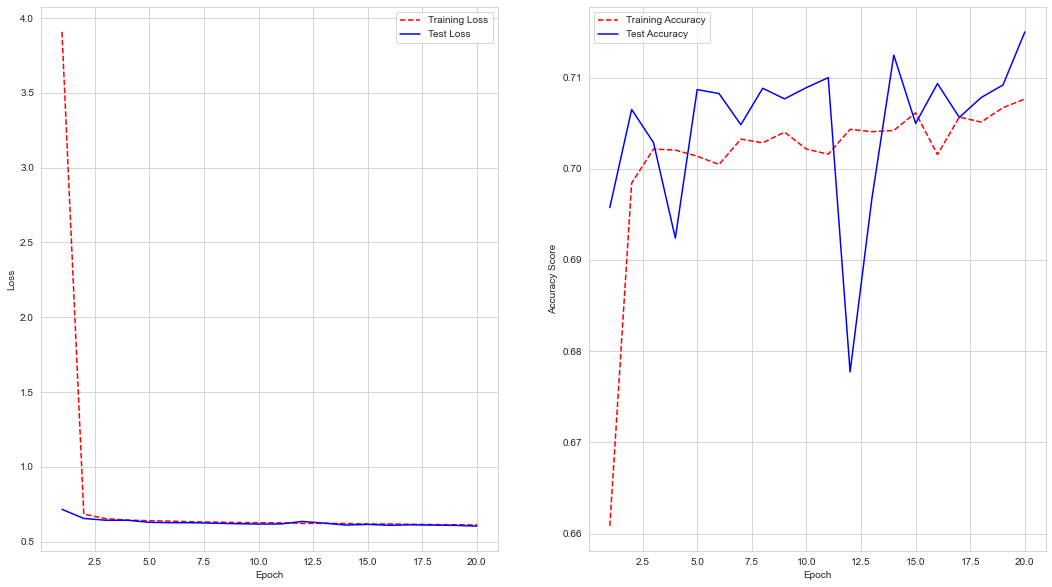

In [40]:
show_loss_acc(history_l2_early)

### L2 small

In [47]:
network_l2 = network_regularization_l2()
history_l2_small_early = train_with_checkpoint(network_l2, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 668us/step - loss: 1.3044 - accuracy: 0.6245 - val_loss: 0.6439 - val_accuracy: 0.6881
Epoch 2/20
5502/5502 [==============================] - 3s 621us/step - loss: 0.6382 - accuracy: 0.6916 - val_loss: 0.6119 - val_accuracy: 0.7097
Epoch 3/20
5502/5502 [==============================] - 3s 619us/step - loss: 0.6197 - accuracy: 0.6946 - val_loss: 0.6060 - val_accuracy: 0.7071
Epoch 4/20
5502/5502 [==============================] - 3s 624us/step - loss: 0.6111 - accuracy: 0.6983 - val_loss: 0.5953 - val_accuracy: 0.7064
Epoch 5/20
5502/5502 [==============================] - 3s 622us/step - loss: 0.6019 - accuracy: 0.6985 - val_loss: 0.5916 - val_accuracy: 0.7083
Epoch 6/20
5502/5502 [==============================] - 3s 628us/step - loss: 0.5968 - accuracy: 0.7006 - val_loss: 0.5890 - val_accuracy: 0.7094
Epoch 7/20
5502/5502 [==============================] - 3s 626us/step - loss: 0.5955 - accuracy: 0.6994 - val_loss: 0.5973 -

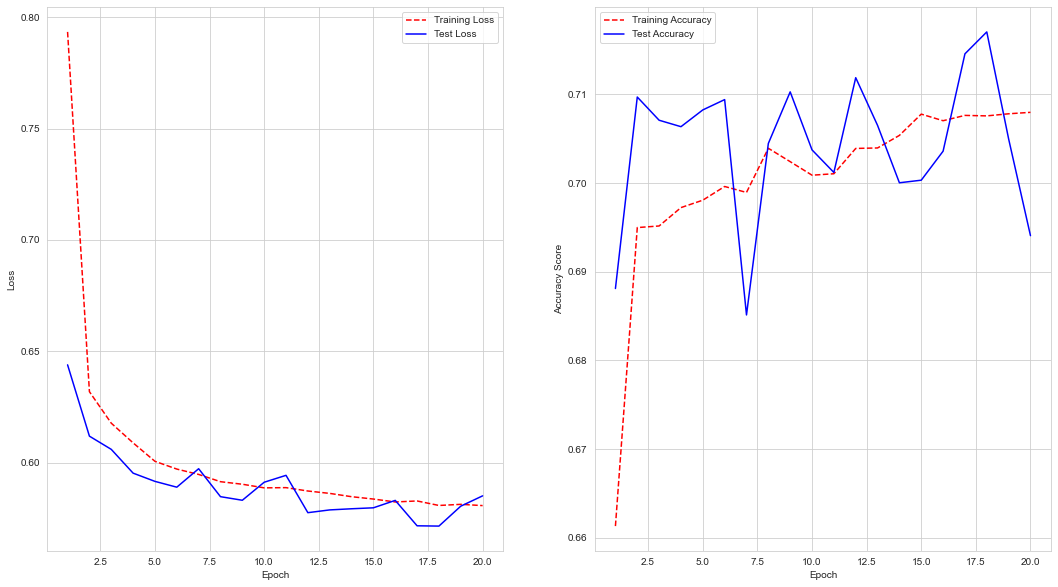

In [48]:
show_loss_acc(history_l2_small_early)

### L1 

In [49]:
network_l1 = network_regularization_l1()
history_l1_early = train_with_checkpoint(network_l1)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 4.4031 - accuracy: 0.4796 - val_loss: 0.8878 - val_accuracy: 0.5771
Epoch 2/20
551/551 [==============================] - 0s 775us/step - loss: 0.8439 - accuracy: 0.6334 - val_loss: 0.7716 - val_accuracy: 0.7019
Epoch 3/20
551/551 [==============================] - 0s 773us/step - loss: 0.7706 - accuracy: 0.6952 - val_loss: 0.7493 - val_accuracy: 0.6990
Epoch 4/20
551/551 [==============================] - 1s 955us/step - loss: 0.7534 - accuracy: 0.6951 - val_loss: 0.7335 - val_accuracy: 0.7062
Epoch 5/20
551/551 [==============================] - 0s 775us/step - loss: 0.7388 - accuracy: 0.7029 - val_loss: 0.7289 - val_accuracy: 0.7087
Epoch 6/20
551/551 [==============================] - 0s 769us/step - loss: 0.7441 - accuracy: 0.6924 - val_loss: 0.7509 - val_accuracy: 0.6821
Epoch 7/20
551/551 [==============================] - 0s 777us/step - loss: 0.7424 - accuracy: 0.6934 - val_loss: 0.7312 - val_accuracy: 0

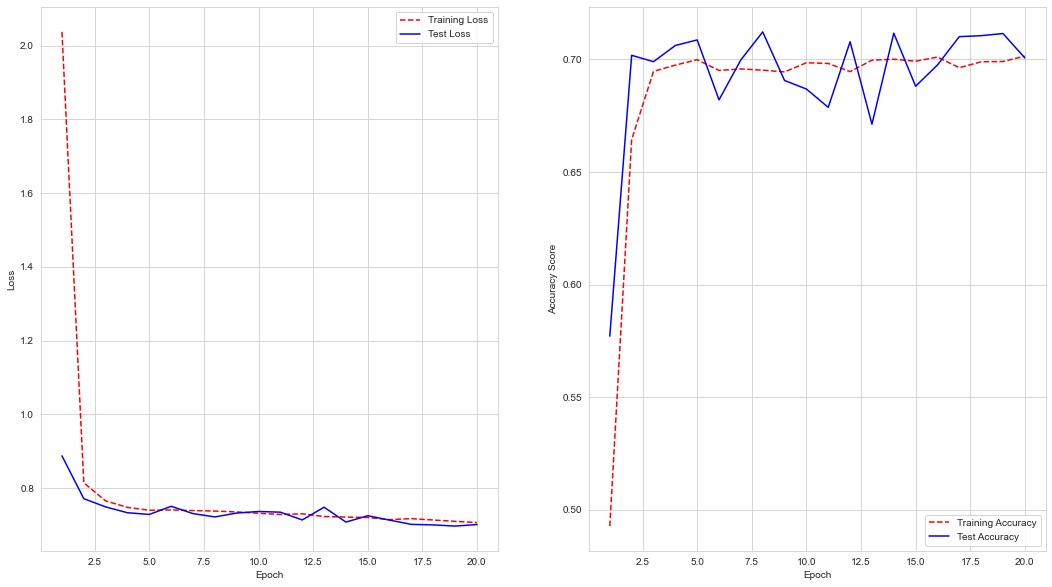

In [50]:
show_loss_acc(history_l1_early)

### L1 small

In [51]:
network_l1 = network_regularization_l1()
history_l1_small_early = train_with_checkpoint(network_l1, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 647us/step - loss: 0.7879 - accuracy: 0.6233 - val_loss: 0.6411 - val_accuracy: 0.7009
Epoch 2/20
5502/5502 [==============================] - 3s 619us/step - loss: 0.6401 - accuracy: 0.6942 - val_loss: 0.6152 - val_accuracy: 0.6971
Epoch 3/20
5502/5502 [==============================] - 3s 626us/step - loss: 0.6195 - accuracy: 0.6983 - val_loss: 0.6095 - val_accuracy: 0.7055
Epoch 4/20
5502/5502 [==============================] - 3s 628us/step - loss: 0.6170 - accuracy: 0.6977 - val_loss: 0.6274 - val_accuracy: 0.6698
Epoch 5/20
5502/5502 [==============================] - 3s 624us/step - loss: 0.6137 - accuracy: 0.6954 - val_loss: 0.6246 - val_accuracy: 0.6683
Epoch 6/20
5502/5502 [==============================] - 3s 626us/step - loss: 0.6103 - accuracy: 0.6966 - val_loss: 0.6001 - val_accuracy: 0.7060
Epoch 7/20
5502/5502 [==============================] - 3s 623us/step - loss: 0.6082 - accuracy: 0.6958 - val_loss: 0.5978 -

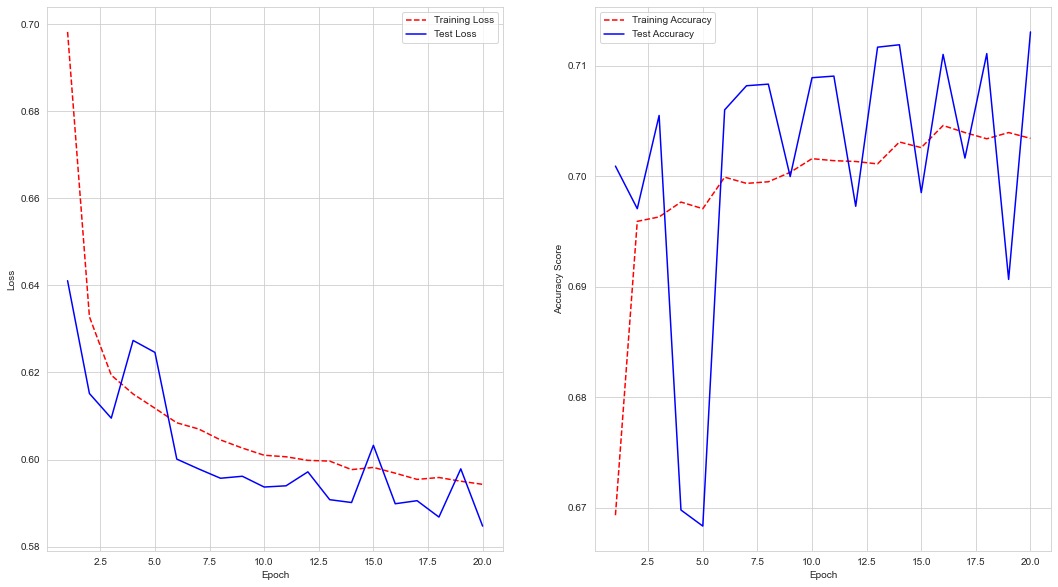

In [52]:
show_loss_acc(history_l1_small_early)

### Dropout

### Base

In [53]:
def create_network_dropout_base():
    network = models.Sequential()

    network.add(layers.Dropout(0.2, input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=1, activation="sigmoid"))

    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return network

network_dropout_base = create_network_dropout_base()
history_dropout_base = train_with_checkpoint(network_dropout_base, batch_size=100)

Epoch 1/20
551/551 [==============================] - 1s 1ms/step - loss: 11.1406 - accuracy: 0.4973 - val_loss: 0.6956 - val_accuracy: 0.4973
Epoch 2/20
551/551 [==============================] - 0s 866us/step - loss: 0.7892 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 3/20
551/551 [==============================] - 0s 869us/step - loss: 0.7187 - accuracy: 0.4993 - val_loss: 0.6925 - val_accuracy: 0.4973
Epoch 4/20
551/551 [==============================] - 0s 871us/step - loss: 0.7060 - accuracy: 0.5106 - val_loss: 0.6926 - val_accuracy: 0.4973
Epoch 5/20
551/551 [==============================] - 0s 871us/step - loss: 0.7013 - accuracy: 0.5004 - val_loss: 0.6915 - val_accuracy: 0.4973
Epoch 6/20
551/551 [==============================] - 0s 871us/step - loss: 0.6979 - accuracy: 0.5038 - val_loss: 0.6938 - val_accuracy: 0.5027
Epoch 7/20
551/551 [==============================] - 0s 871us/step - loss: 0.6953 - accuracy: 0.5049 - val_loss: 0.6940 - val_accuracy: 

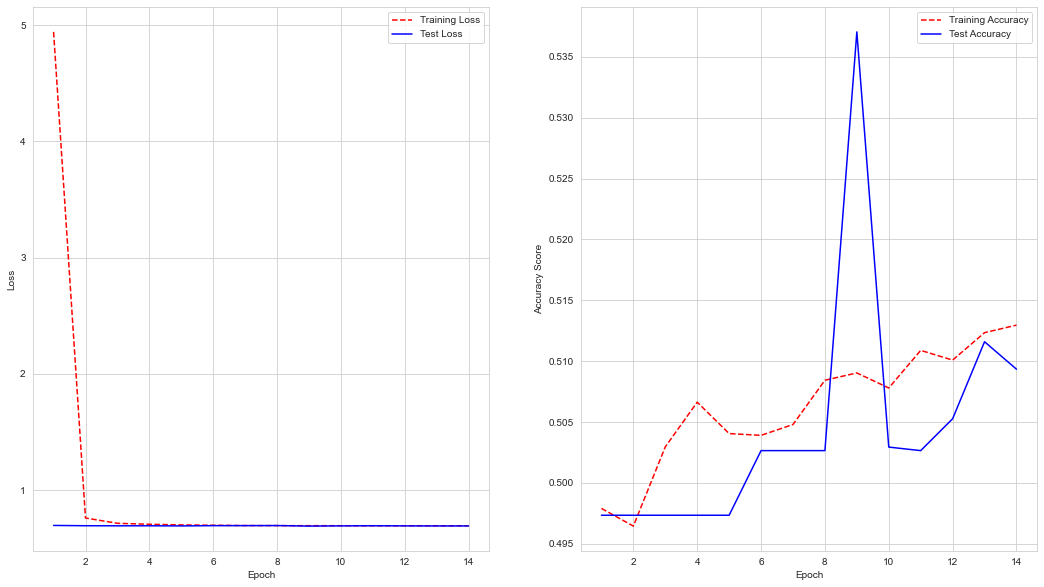

In [54]:
show_loss_acc(history_dropout_base)

### Base small

In [55]:
network_dropout_base = create_network_dropout_base()
history_dropout_base_small = train_with_checkpoint(network_dropout_base, batch_size=10)

Epoch 1/20
5502/5502 [==============================] - 4s 666us/step - loss: 3.7429 - accuracy: 0.4976 - val_loss: 0.6928 - val_accuracy: 0.5030
Epoch 2/20
5502/5502 [==============================] - 4s 642us/step - loss: 0.6955 - accuracy: 0.5108 - val_loss: 0.6910 - val_accuracy: 0.5032
Epoch 3/20
5502/5502 [==============================] - 4s 649us/step - loss: 0.6925 - accuracy: 0.5166 - val_loss: 0.6927 - val_accuracy: 0.5027
Epoch 4/20
5502/5502 [==============================] - 4s 659us/step - loss: 0.6923 - accuracy: 0.5185 - val_loss: 0.6930 - val_accuracy: 0.5032
Epoch 5/20
5502/5502 [==============================] - 4s 660us/step - loss: 0.6919 - accuracy: 0.5177 - val_loss: 0.6932 - val_accuracy: 0.5043
Epoch 6/20
5502/5502 [==============================] - 4s 649us/step - loss: 0.6903 - accuracy: 0.5251 - val_loss: 0.6935 - val_accuracy: 0.5028
Epoch 7/20
5502/5502 [==============================] - 4s 642us/step - loss: 0.6889 - accuracy: 0.5251 - val_loss: 0.6939 -

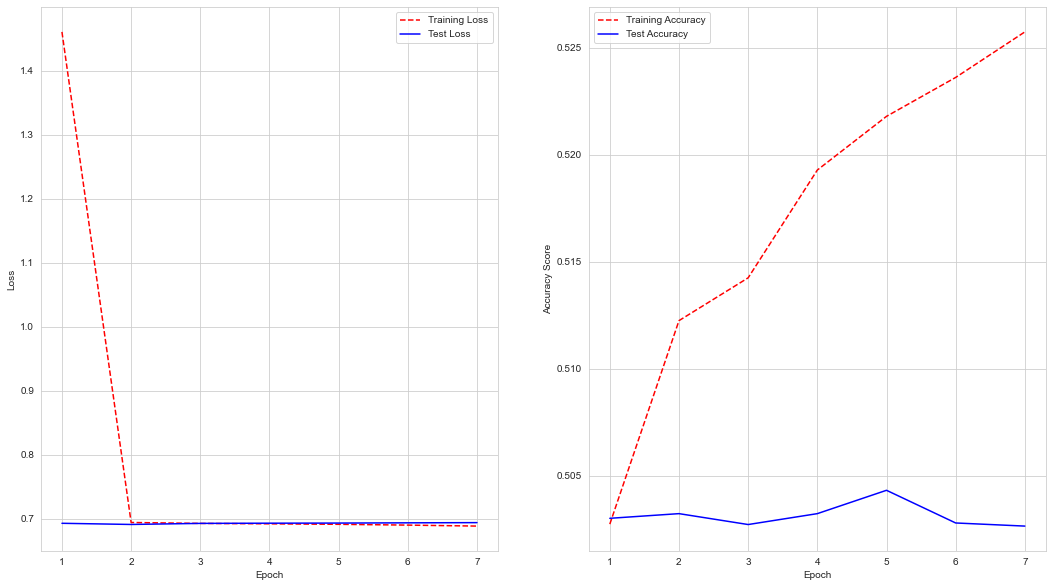

In [56]:
show_loss_acc(history_dropout_base_small)

### Networks Cross-validation

### Base

In [57]:
network_base_cv = KerasClassifier(build_fn=create_network, epochs=10, batch_size=100, verbose=0)
score_base = cross_val_score(network_base_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_base}, mean: {score_base.mean()}')

Scores: [0.69904041 0.71227103 0.72230297 0.71735972 0.70834547 0.71222919
 0.71368331 0.70961177 0.7053948  0.70728517], mean: 0.7107523858547211


In [58]:
network_base_small_cv = KerasClassifier(build_fn=create_network, epochs=10, batch_size=10, verbose=0)
score_base_small = cross_val_score(network_base_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_base_small}, mean: {score_base_small.mean()}')

Scores: [0.70994473 0.64713579 0.51410294 0.71357954 0.70979935 0.72168094
 0.70946634 0.70495856 0.7053948  0.7133925 ], mean: 0.684945547580719


### L2

In [59]:
network_l2_cv = KerasClassifier(build_fn=network_regularization_l2, epochs=10, batch_size=100, verbose=0)
score_l2 = cross_val_score(network_l2_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l2}, mean: {score_l2.mean()}')

Scores: [0.50014538 0.70834547 0.71430647 0.69845885 0.70761847 0.69972372
 0.70641267 0.69914204 0.70801222 0.69986916], mean: 0.6842034459114075


In [60]:
network_l2_small_cv = KerasClassifier(build_fn=network_regularization_l2, epochs=10, batch_size=10, verbose=0)
score_l2_small = cross_val_score(network_l2_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l2_small}, mean: {score_l2_small.mean()}')

Scores: [0.71314335 0.70660079 0.72143066 0.71096247 0.71706891 0.71179295
 0.70466775 0.71266538 0.69230771 0.70684892], mean: 0.7097488880157471


### L1

In [61]:
network_l1_cv = KerasClassifier(build_fn=network_regularization_l1, epochs=10, batch_size=100, verbose=0)
score_l1 = cross_val_score(network_l1_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l1}, mean: {score_l1.mean()}')

Scores: [0.69860423 0.70892704 0.71009016 0.68551904 0.70180285 0.71048421
 0.70292276 0.70612186 0.69419807 0.69739711], mean: 0.7016067326068878


In [62]:
network_l1_small_cv = KerasClassifier(build_fn=network_regularization_l1, epochs=10, batch_size=10, verbose=0)
score_l1_small = cross_val_score(network_l1_small_cv, x, y, cv=10, n_jobs=-1)
print(f'Scores: {score_l1_small}, mean: {score_l1_small.mean()}')

Scores: [0.70485604 0.7087816  0.71939516 0.70340216 0.71110791 0.70801222
 0.70728517 0.71295625 0.69521594 0.70597643], mean: 0.7076988875865936


### Score comparison

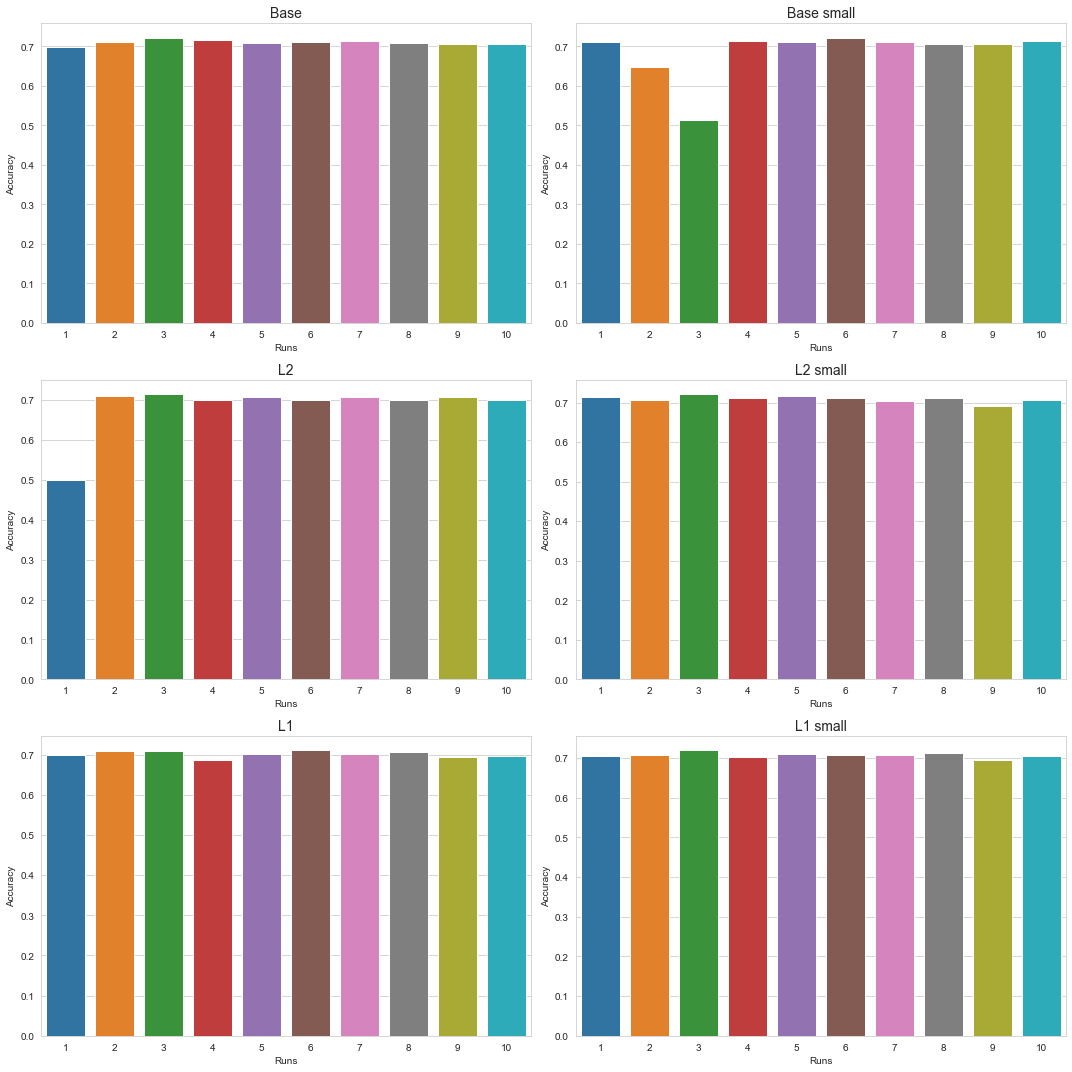

In [63]:
scores = [score_base, score_base_small, # score_base_big, score_droput_base_small,
          score_l2, score_l2_small, # score_l2_big, score_dropout_l2_small,
          score_l1, score_l1_small, # score_l1_big, score_dropout_l1_small
         ]

scores_max = [np.amax(score_base), np.amax(score_base_small), # np.amax(score_base_big), np.amax(score_droput_base_small),
              np.amax(score_l2), np.amax(score_l2_small), # np.amax(score_l2_big), np.amax(score_dropout_l2_small),
              np.amax(score_l1), np.amax(score_l1_small), # np.amax(score_l1_big), np.amax(score_dropout_l1_small)
             ]

means = [np.mean(score_base), np.mean(score_base_small), # np.mean(score_base_big), np.mean(score_droput_base_small),
         np.mean(score_l2), np.mean(score_l2_small), # np.mean(score_l2_big), np.mean(score_dropout_l2_small),
         np.mean(score_l1), np.mean(score_l1_small), # np.mean(score_l1_big), np.mean(score_dropout_l1_small)
        ]

labels = ['Base', 'Base small', # 'Base big', 'Base dropout small',
         'L2', 'L2 small', # 'L2 big', 'L2 dropout small',
         'L1', 'L1 small', # 'L1 big', 'L1 dropout small'
         ]

d = {'Labels': labels, 'Scores max': scores_max, 'Means': means}
data_scores = pd.DataFrame(data=d)
runs = np.r_[1:11]

sns.set_style('whitegrid')
fig1, axs1 = plt.subplots(3, 2, figsize=(15, 15), num='Scores visualized')  # 3x4
plt.title('Scores')

for i in range(0, 3):
    for j in range(0, 2):
        axs1[i, j].set_title(labels[i*2+j], fontsize=14)
        axs1[i, j].set_xlabel('Runs')
        axs1[i, j].set_ylabel('Accuracy')
        sns.barplot(ax=axs1[i, j], x=runs, y=scores[i*2+j])

plt.tight_layout()

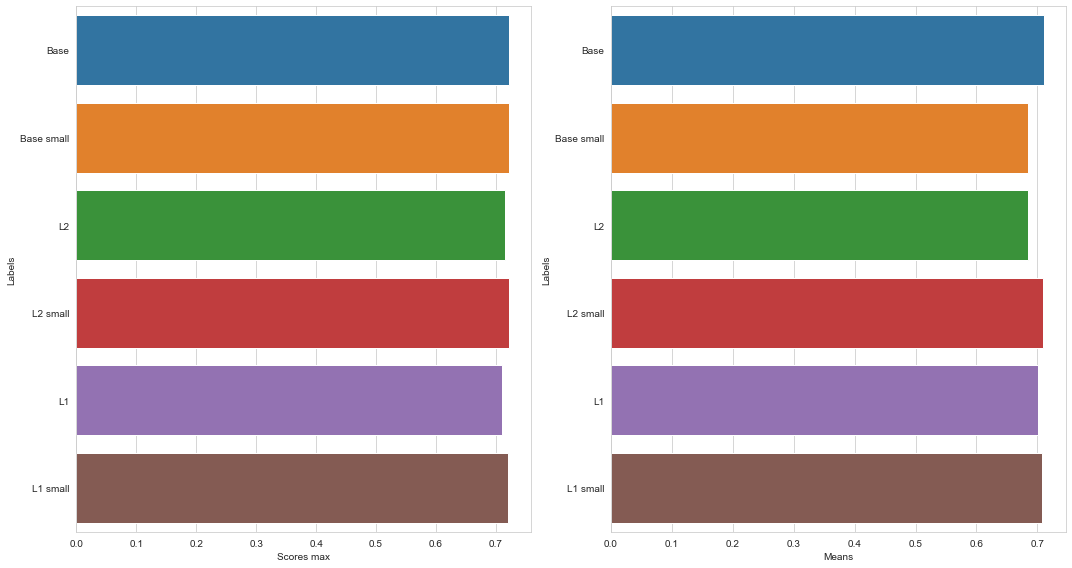

In [64]:
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 8), num='Scores visualized')
sns.barplot(ax=axs2[0], data=data_scores, x='Scores max', y='Labels')
sns.barplot(ax=axs2[1], data=data_scores, x='Means', y='Labels')
plt.tight_layout()

## Tuning

In [ ]:
# def network_tune(optimizer='adam', init_mode='uniform', weight_constraint=0, neurons=6):
#     network = models.Sequential()
#     network.add(layers.Dense(units=neurons, activation="relu", kernel_initializer=init_mode, input_shape=(11,), kernel_constraint=maxnorm(weight_constraint)))
#     network.add(layers.Dense(units=neurons, activation="relu", kernel_initializer=init_mode))
#     network.add(layers.Dense(units=1, activation="sigmoid", kernel_initializer=init_mode))

#     network.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#     return network

# neural_network_tuninig = KerasClassifier(build_fn=network_tune, verbose=1)

# epochs = [5, 10, 20]
# batches = [10, 50, 100, 1000]
# optimizers = ["rmsprop", "adam", "sgd"]  # , "adadelta", "adagrad", "adamax", "nadam", "ftrl"
# # learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# # momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# # activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# weight_constraint = [1, 2, 3, 4, 5]
# # dropout_rate = [0.0, 0.1, 0.2, 0.5, 0.8, 0.9]
# neurons = [1, 5, 10, 20, 50]

# start = time.time()
# hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init_mode=init_mode,
#                        weight_constraint=weight_constraint, neurons=neurons)
# grid = GridSearchCV(estimator=neural_network_tuninig, param_grid=hyperparameters, n_jobs=-1)
# grid_result = grid.fit(x, y)
# end = time.time()
# print(f'Best params: {grid_result.best_params_}, best score: {grid_result.best_score_}, took {end - start} seconds.')

### Custom networks

In [65]:
def run_test(network):
    callbacks = [EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
                 ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True)]
    
    estimator = KerasClassifier(build_fn=network, epochs=20, batch_size=10, verbose=1)
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    results = cross_val_score(estimator, x, y, cv=kfold, fit_params={'callbacks': callbacks}, n_jobs=-1)
    print(f'Scores: {results}, mean: {results.mean()}\n')
    
    return results

def network_11_6_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network
    
def network_11_12_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_6_3_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=3, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_6_4_2_1():
    network = models.Sequential()
    network.add(layers.Dense(units=6, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=4, activation="relu"))
    network.add(layers.Dense(units=2, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_12_6_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

def network_11_12_6_3_1():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation="relu", input_shape=(11,)))
    network.add(layers.Dense(units=6, activation="relu"))
    network.add(layers.Dense(units=3, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    
    network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return network

In [66]:
start = time.time()
res_11_6_1 = run_test(network_11_6_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.71968597 0.7095086  0.70398372 0.7154696  0.71256179 0.72197181
 0.71353787 0.71324706 0.70830303 0.71804565], mean: 0.7136315107345581

Training took 181.40080785751343 seconds.


In [67]:
start = time.time()
res_11_12_1 = run_test(network_11_12_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.71954054 0.72157604 0.72244841 0.71183485 0.70500147 0.71033883
 0.7196452  0.71252    0.70364982 0.72109932], mean: 0.7147654473781586

Training took 201.61337089538574 seconds.


In [68]:
start = time.time()
res_11_6_3_1 = run_test(network_11_6_3_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.71430647 0.71357954 0.71590579 0.71067172 0.70485604 0.72328049
 0.71295625 0.72037226 0.50865203 0.71542823], mean: 0.694000881910324

Training took 192.9187273979187 seconds.


In [69]:
start = time.time()
res_11_6_4_2_1 = run_test(network_11_6_4_2_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.72099447 0.50290781 0.489968   0.70907241 0.71096247 0.72095388
 0.71702778 0.7378217  0.50865203 0.71077502], mean: 0.6529135584831238

Training took 200.6035327911377 seconds.


In [70]:
start = time.time()
res_11_12_6_1 = run_test(network_11_12_6_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.71852285 0.72433847 0.70674616 0.71924978 0.71430647 0.72255343
 0.72313511 0.73316854 0.70757598 0.72575253], mean: 0.7195349335670471

Training took 217.95588159561157 seconds.


In [71]:
start = time.time()
res_11_12_6_3_1 = run_test(network_11_12_6_3_1)
end = time.time()
print(f'Training took {end - start} seconds.')

Scores: [0.49069497 0.71794128 0.70500147 0.72128528 0.71503341 0.72080851
 0.72342592 0.73418641 0.50865203 0.73142356], mean: 0.6768452852964402

Training took 225.8936252593994 seconds.


### Score comparison

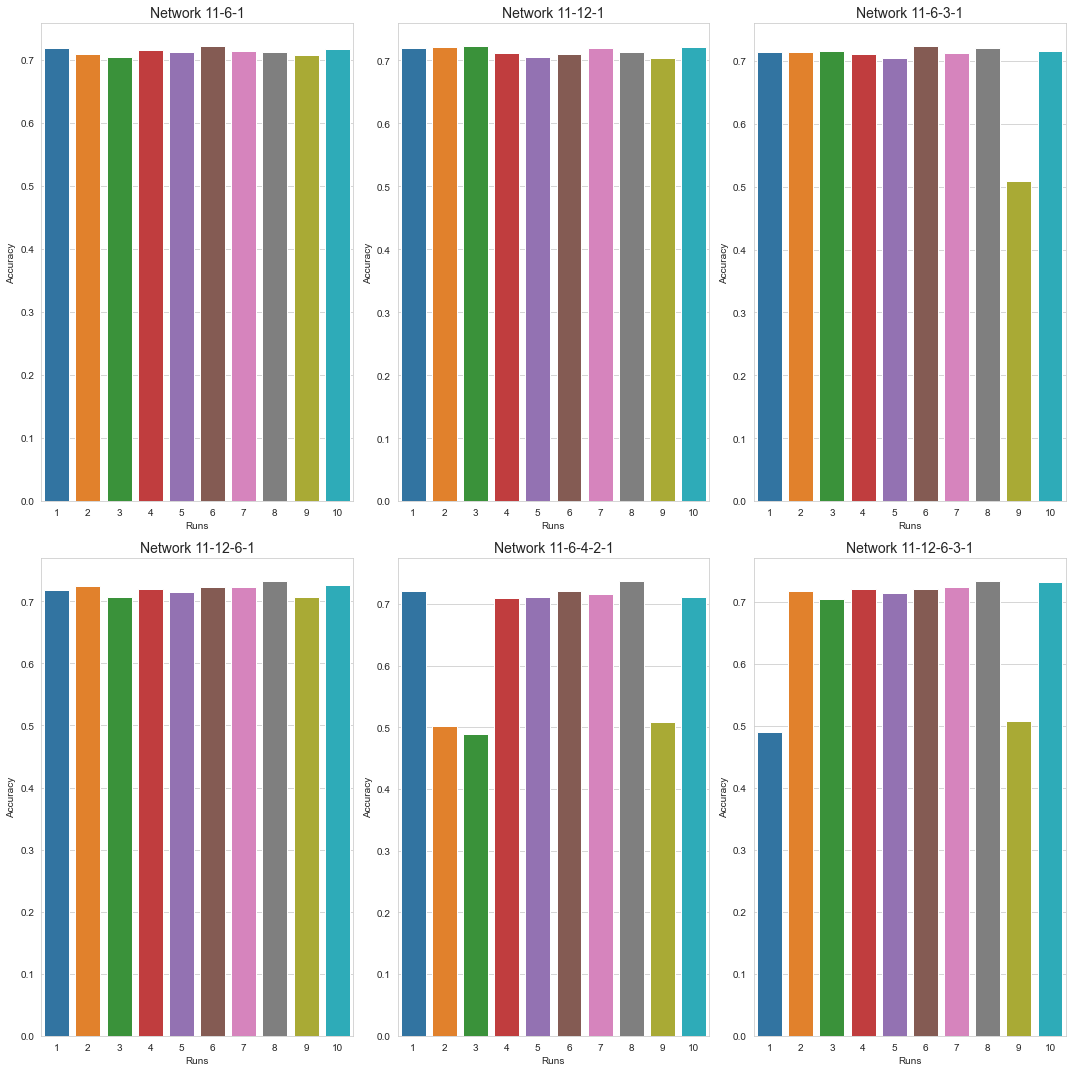

In [72]:
scores_2 = [res_11_6_1, res_11_12_1, res_11_6_3_1, res_11_12_6_1, res_11_6_4_2_1, res_11_12_6_3_1]

scores_max_2 = [np.amax(res_11_6_1), np.amax(res_11_12_1), np.amax(res_11_6_3_1), np.amax(res_11_12_6_1),
                np.amax(res_11_6_4_2_1), np.amax(res_11_12_6_3_1)]

means_2 = [np.mean(res_11_6_1), np.mean(res_11_12_1), np.mean(res_11_6_3_1), np.mean(res_11_12_6_1),
           np.mean(res_11_6_4_2_1), np.mean(res_11_12_6_3_1)]

labels_2 = ['Network 11-6-1', 'Network 11-12-1', 'Network 11-6-3-1', 'Network 11-12-6-1',
            'Network 11-6-4-2-1', 'Network 11-12-6-3-1']

d_2 = {'Labels': labels_2, 'Scores max': scores_max_2, 'Means': means_2}
data_scores_2 = pd.DataFrame(data=d_2)
runs = np.r_[1:11]

sns.set_style('whitegrid')
fig3, axs3 = plt.subplots(2, 3, figsize=(15, 15), num='Scores visualized')
plt.title('Scores')

for i in range(0, 2):
    for j in range(0, 3):
        axs3[i, j].set_title(labels_2[i*3+j], fontsize=14)
        axs3[i, j].set_xlabel('Runs')
        axs3[i, j].set_ylabel('Accuracy')
        sns.barplot(ax=axs3[i, j], x=runs, y=scores_2[i*3+j])

plt.tight_layout()

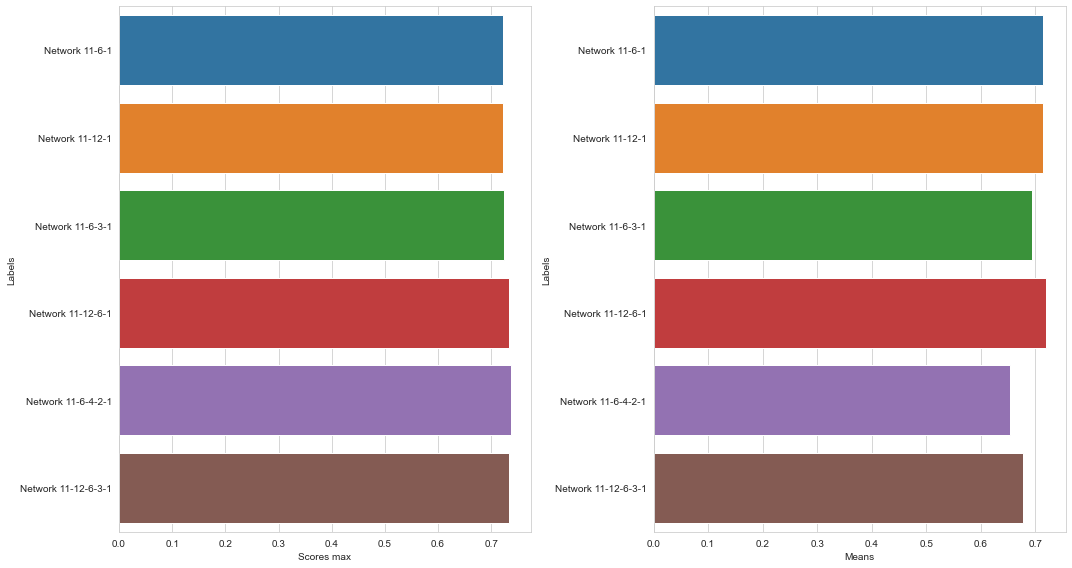

In [73]:
fig4, axs4 = plt.subplots(1, 2, figsize=(15, 8), num='Scores visualized')
sns.barplot(ax=axs4[0], data=data_scores_2, x='Scores max', y='Labels')
sns.barplot(ax=axs4[1], data=data_scores_2, x='Means', y='Labels')
plt.tight_layout()

### Mega Network

In [75]:
network_mega = models.Sequential()
network_mega.add(layers.Dense(units=128, activation="relu", input_shape=(11,)))
network_mega.add(layers.Dense(units=64, activation="relu"))
network_mega.add(layers.Dense(units=1, activation="sigmoid"))

network_mega.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_mega = network_mega.fit(x_train, y_train, epochs=100, verbose=1, batch_size=100,
                      validation_data=(x_test, y_test))

Epoch 1/100
551/551 [==============================] - 1s 1ms/step - loss: 0.8333 - accuracy: 0.6549 - val_loss: 0.5763 - val_accuracy: 0.6998
Epoch 2/100
551/551 [==============================] - 1s 940us/step - loss: 0.5979 - accuracy: 0.6937 - val_loss: 0.5720 - val_accuracy: 0.7157
Epoch 3/100
551/551 [==============================] - 1s 958us/step - loss: 0.6032 - accuracy: 0.6917 - val_loss: 0.5706 - val_accuracy: 0.7165
Epoch 4/100
551/551 [==============================] - 1s 979us/step - loss: 0.5750 - accuracy: 0.7082 - val_loss: 0.5791 - val_accuracy: 0.7096
Epoch 5/100
551/551 [==============================] - 1s 964us/step - loss: 0.5963 - accuracy: 0.6954 - val_loss: 0.5698 - val_accuracy: 0.7101
Epoch 6/100
551/551 [==============================] - 0s 900us/step - loss: 0.5879 - accuracy: 0.7027 - val_loss: 0.5946 - val_accuracy: 0.6997
Epoch 7/100
551/551 [==============================] - 1s 908us/step - loss: 0.5794 - accuracy: 0.7072 - val_loss: 0.5643 - val_accu

551/551 [==============================] - 0s 898us/step - loss: 0.5537 - accuracy: 0.7250 - val_loss: 0.5553 - val_accuracy: 0.7238
Epoch 58/100
551/551 [==============================] - 0s 884us/step - loss: 0.5541 - accuracy: 0.7257 - val_loss: 0.5600 - val_accuracy: 0.7203
Epoch 59/100
551/551 [==============================] - 1s 881us/step - loss: 0.5542 - accuracy: 0.7242 - val_loss: 0.5501 - val_accuracy: 0.7275
Epoch 60/100
551/551 [==============================] - 1s 924us/step - loss: 0.5527 - accuracy: 0.7250 - val_loss: 0.5516 - val_accuracy: 0.7256
Epoch 61/100
551/551 [==============================] - 1s 922us/step - loss: 0.5556 - accuracy: 0.7247 - val_loss: 0.5513 - val_accuracy: 0.7251
Epoch 62/100
551/551 [==============================] - 1s 929us/step - loss: 0.5558 - accuracy: 0.7234 - val_loss: 0.5490 - val_accuracy: 0.7272
Epoch 63/100
551/551 [==============================] - 0s 904us/step - loss: 0.5534 - accuracy: 0.7236 - val_loss: 0.5496 - val_accuracy

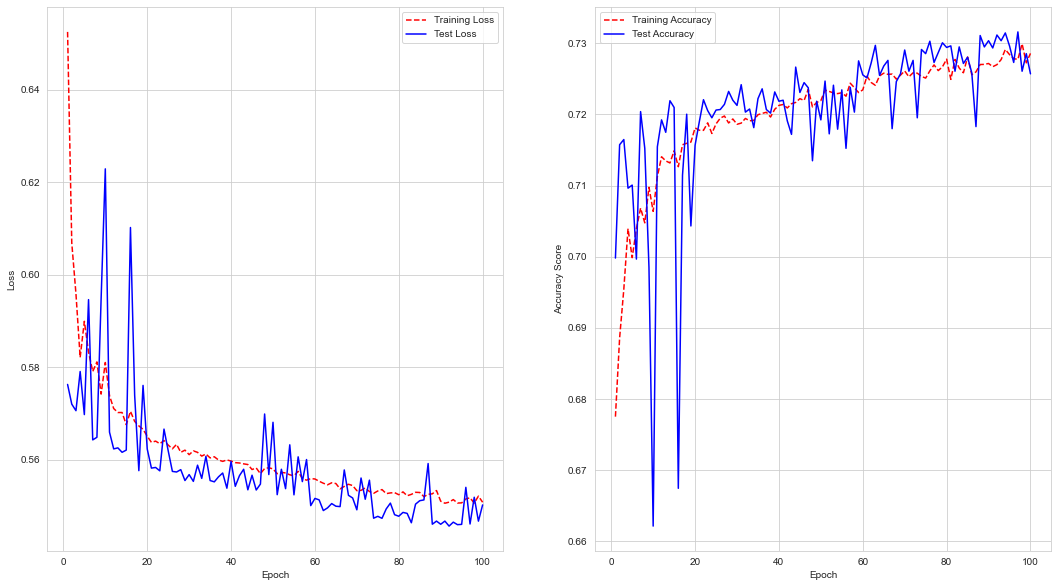

In [76]:
show_loss_acc(history_mega)

In [199]:
# def custom_loss(y_true, y_pred):
#     y_true=tf.cast(y_true, tf.float32)
#     y_pred=tf.cast(y_pred, tf.float32)
#     return 1/len(y_true) * K.sum(tf.math.exp(- y_pred * y_true))
    
# network = models.Sequential()
# network.add(layers.Dense(6, activation = 'relu' , input_shape=(11,),dtype='float32'))
# network.add(layers.Dense(6, activation = 'relu'))
# network.add(layers.Dense(1, activation = 'sigmoid'))

# network_cl.compile(optimizer='adam', loss=custom_loss, metrics=["accuracy"])
# history_cl = network.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=100, epochs=100)